In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape) # 60000 training images

(60000, 28, 28) (60000,)


# Normalize Data and Plot Raw Data

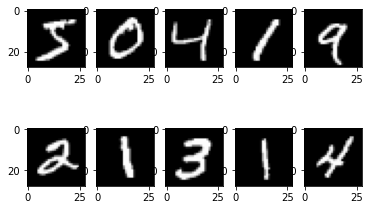

In [3]:
# Then we normalize the data from 0 to 255 become 0 to 1
x_train,x_test = x_train/255.0, x_test/255.0

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i],cmap='gray')
plt.show()

# Building the Model

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # Flatten our images matrix to a single array
    keras.layers.Dense(256,activation='relu'), # The Fully connected layer
    keras.layers.Dense(10) # We have 10 classes for the 10 digits from 0 to 9   
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# Building the Loss and Optimizer

In [5]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
# This is because y is an integer class label not one hot encoded
# logits is true because Softmax function has not been applied to them
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(loss=loss,optimizer=optim,metrics=metrics)


# Training the Model

In [6]:
batch_size = 64
epochs = 5 # 5 Full iteration over the sample
model.fit(x_train,y_train, batch_size=batch_size,epochs=epochs,shuffle=True,verbose=2)
# verbose is what we see while training the model
# verbose = 2 will show the number of epochs

Train on 60000 samples
Epoch 1/5
60000/60000 - 6s - loss: 0.2594 - accuracy: 0.9252
Epoch 2/5
60000/60000 - 5s - loss: 0.1093 - accuracy: 0.9675
Epoch 3/5
60000/60000 - 5s - loss: 0.0715 - accuracy: 0.9788
Epoch 4/5
60000/60000 - 5s - loss: 0.0523 - accuracy: 0.9841
Epoch 5/5
60000/60000 - 5s - loss: 0.0393 - accuracy: 0.9882


# Evaluating the Model

In [7]:
model.evaluate(x_test,y_test,batch_size=batch_size,verbose=2)

10000/1 - 0s - loss: 0.0382 - accuracy: 0.9765


[0.07470912002660333, 0.9765]

# Making Predictions

In [11]:
# To make predictions we need the Softmax Layer
predictions = model.predict(x_test,batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred10 = predictions[0:10]
label10 = np.argmax(pred10, axis=1)
print(label10)

[7 2 1 0 4 1 4 9 5 9]
